In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# ! -> run a command through the python notebook
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 94% 140M/149M [00:01<00:00, 91.8MB/s]
100% 149M/149M [00:01<00:00, 85.6MB/s]


In [20]:
#code to remove duplicates in dataset
import hashlib

def compute_hash(file):
    """Compute the MD5 hash of a file."""
    hasher = hashlib.md5()
    with open(file, 'rb') as f:
        buf = f.read()
        hasher.update(buf)
    return hasher.hexdigest()

def list_files(hash_dict, base_dirs):
    """
    List all files in the given directories and compute their hashes.
    Args:
    - hash_dict (dict): Dictionary to store file hashes and their corresponding paths.
    - base_dirs (list): List of base directories (Training, Testing).
    """
    for base_dir in base_dirs:
        for root, dirs, files in os.walk(base_dir):
            for file in files:
                if file.endswith(".jpg"):
                    file_path = os.path.join(root, file)
                    file_hash = compute_hash(file_path)
                    if file_hash in hash_dict:
                        hash_dict[file_hash].append(file_path)
                    else:
                        hash_dict[file_hash] = [file_path]

def remove_duplicates(hash_dict):
    """
    Remove duplicate files based on their hashes.
    Args:
    - hash_dict (dict): Dictionary containing file hashes and their paths.
    """
    duplicate_count = 0
    for hash_value, file_paths in hash_dict.items():
        if len(file_paths) > 1:
            for file_path in file_paths[1:]:
                print(f"Removing duplicate (hash : {hash_value}) : {file_path}")
                os.remove(file_path)
                duplicate_count += 1
    print(f"Number of duplicates removed: {duplicate_count}")

# Paths to your datasets
training_dir = '/content/Training'
testing_dir = '/content/Testing'

# Create hash dictionary
hash_dict = {}

# List and remove duplicate files
list_files(hash_dict, [training_dir, testing_dir])
remove_duplicates(hash_dict)

Removing duplicate (hash : 99e0890275f773a6baa17d02fc0bdefb) : /content/Training/pituitary/Tr-pi_0046.jpg
Removing duplicate (hash : 669562a698a0159bde95c5e3bee8077d) : /content/Testing/pituitary/Te-pi_0044.jpg
Removing duplicate (hash : 584ca4664acb9536e369e49eb98239ad) : /content/Testing/pituitary/Te-pi_0055.jpg
Removing duplicate (hash : 667db113b8954435f1ceab3122f5b296) : /content/Training/pituitary/Tr-pi_0676.jpg
Removing duplicate (hash : 406052e058bc64ffed1f9c9e2b65687c) : /content/Training/pituitary/Tr-pi_0342.jpg
Removing duplicate (hash : b612aa0d702020c3dd896f4294000a02) : /content/Training/pituitary/Tr-pi_0108.jpg
Removing duplicate (hash : a28c0aaf1e5ee802731aef2571094300) : /content/Training/pituitary/Tr-pi_0517.jpg
Removing duplicate (hash : a28c0aaf1e5ee802731aef2571094300) : /content/Training/pituitary/Tr-pi_0516.jpg
Removing duplicate (hash : a28c0aaf1e5ee802731aef2571094300) : /content/Testing/pituitary/Te-piTr_0001.jpg
Removing duplicate (hash : 7aace426ed99cbee63e3

In [21]:
#iterate through datasets and create a df based off of the dataset
def get_class_paths(path):
  classes = []
  class_paths = []
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        classes.append(label)
        class_paths.append(image_path)

  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [22]:
tr_df = get_class_paths("/content/Training")

In [23]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_0763.jpg,glioma
1,/content/Training/glioma/Tr-gl_0108.jpg,glioma
2,/content/Training/glioma/Tr-gl_0861.jpg,glioma
3,/content/Training/glioma/Tr-glTr_0006.jpg,glioma
4,/content/Training/glioma/Tr-gl_0477.jpg,glioma
...,...,...
5516,/content/Training/notumor/Tr-no_0252.jpg,notumor
5517,/content/Training/notumor/Tr-no_1035.jpg,notumor
5518,/content/Training/notumor/Tr-no_1404.jpg,notumor
5519,/content/Training/notumor/Tr-no_0821.jpg,notumor


In [24]:
ts_df = get_class_paths("/content/Testing")

In [25]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0148.jpg,glioma
1,/content/Testing/glioma/Te-gl_0210.jpg,glioma
2,/content/Testing/glioma/Te-gl_0201.jpg,glioma
3,/content/Testing/glioma/Te-gl_0257.jpg,glioma
4,/content/Testing/glioma/Te-glTr_0003.jpg,glioma
...,...,...
1200,/content/Testing/notumor/Te-no_0116.jpg,notumor
1201,/content/Testing/notumor/Te-no_0179.jpg,notumor
1202,/content/Testing/notumor/Te-no_0292.jpg,notumor
1203,/content/Testing/notumor/Te-no_0281.jpg,notumor


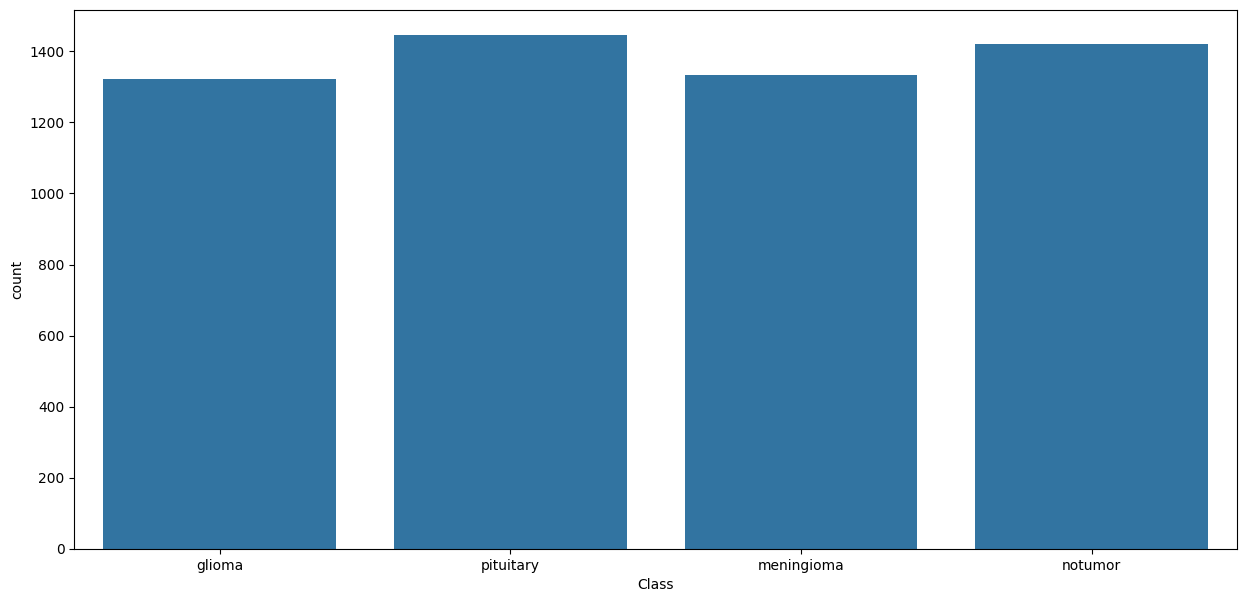

In [26]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

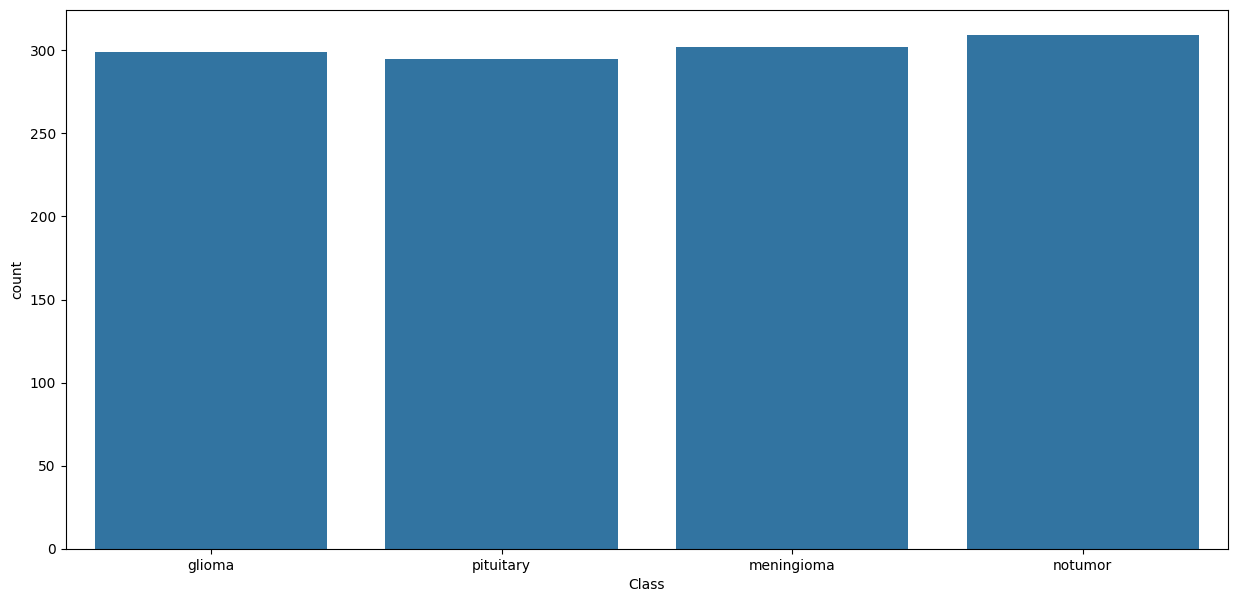

In [27]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [28]:
from sklearn.model_selection import train_test_split
# functions used to evalueate performance of our model
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
# allows us to build a nerual network model layer by layer seequential = add layer after layer in a linear fashion
from tensorflow.keras.models import Sequential
# functions we use to build and train the model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall

In [29]:
#validation dataset and testing dataset
# Stratify = data is split in a way that maitains the same proportion of each class label in both training and datasets as it exists in the og dataset
valid_df , ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [30]:
valid_df

,Class Path,Class
692,/content/Testing/meningioma/Te-me_0167.jpg,meningioma
1073,/content/Testing/notumor/Te-no_0273.jpg,notumor
1158,/content/Testing/notumor/Te-no_0213.jpg,notumor
1163,/content/Testing/notumor/Te-no_0117.jpg,notumor
247,/content/Testing/glioma/Te-gl_0269.jpg,glioma
...,...,...
1059,/content/Testing/notumor/Te-no_0355.jpg,notumor
253,/content/Testing/glioma/Te-gl_0076.jpg,glioma
1108,/content/Testing/notumor/Te-no_0370.jpg,notumor
573,/content/Testing/pituitary/Te-pi_0283.jpg,pituitary


In [31]:
ts_df

,Class Path,Class
1075,/content/Testing/notumor/Te-no_0365.jpg,notumor
194,/content/Testing/glioma/Te-gl_0139.jpg,glioma
958,/content/Testing/notumor/Te-no_0082.jpg,notumor
392,/content/Testing/pituitary/Te-pi_0207.jpg,pituitary
156,/content/Testing/glioma/Te-gl_0031.jpg,glioma
...,...,...
895,/content/Testing/meningioma/Te-me_0042.jpg,meningioma
284,/content/Testing/glioma/Te-gl_0204.jpg,glioma
64,/content/Testing/glioma/Te-gl_0131.jpg,glioma
765,/content/Testing/meningioma/Te-me_0066.jpg,meningioma


In [32]:
batch_size = 32

img_size = (299, 299)
# image data generator: easily preprocess imgaes by resclaing hte pixel values and adjusting the brightness
# rescale -> resacles pixel values from 0- 255 to 0 -1 brightness_range -> change the brightness so that we can generalize the brightness for all images
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [33]:
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5521 validated image filenames belonging to 4 classes.
Found 602 validated image filenames belonging to 4 classes.
Found 603 validated image filenames belonging to 4 classes.


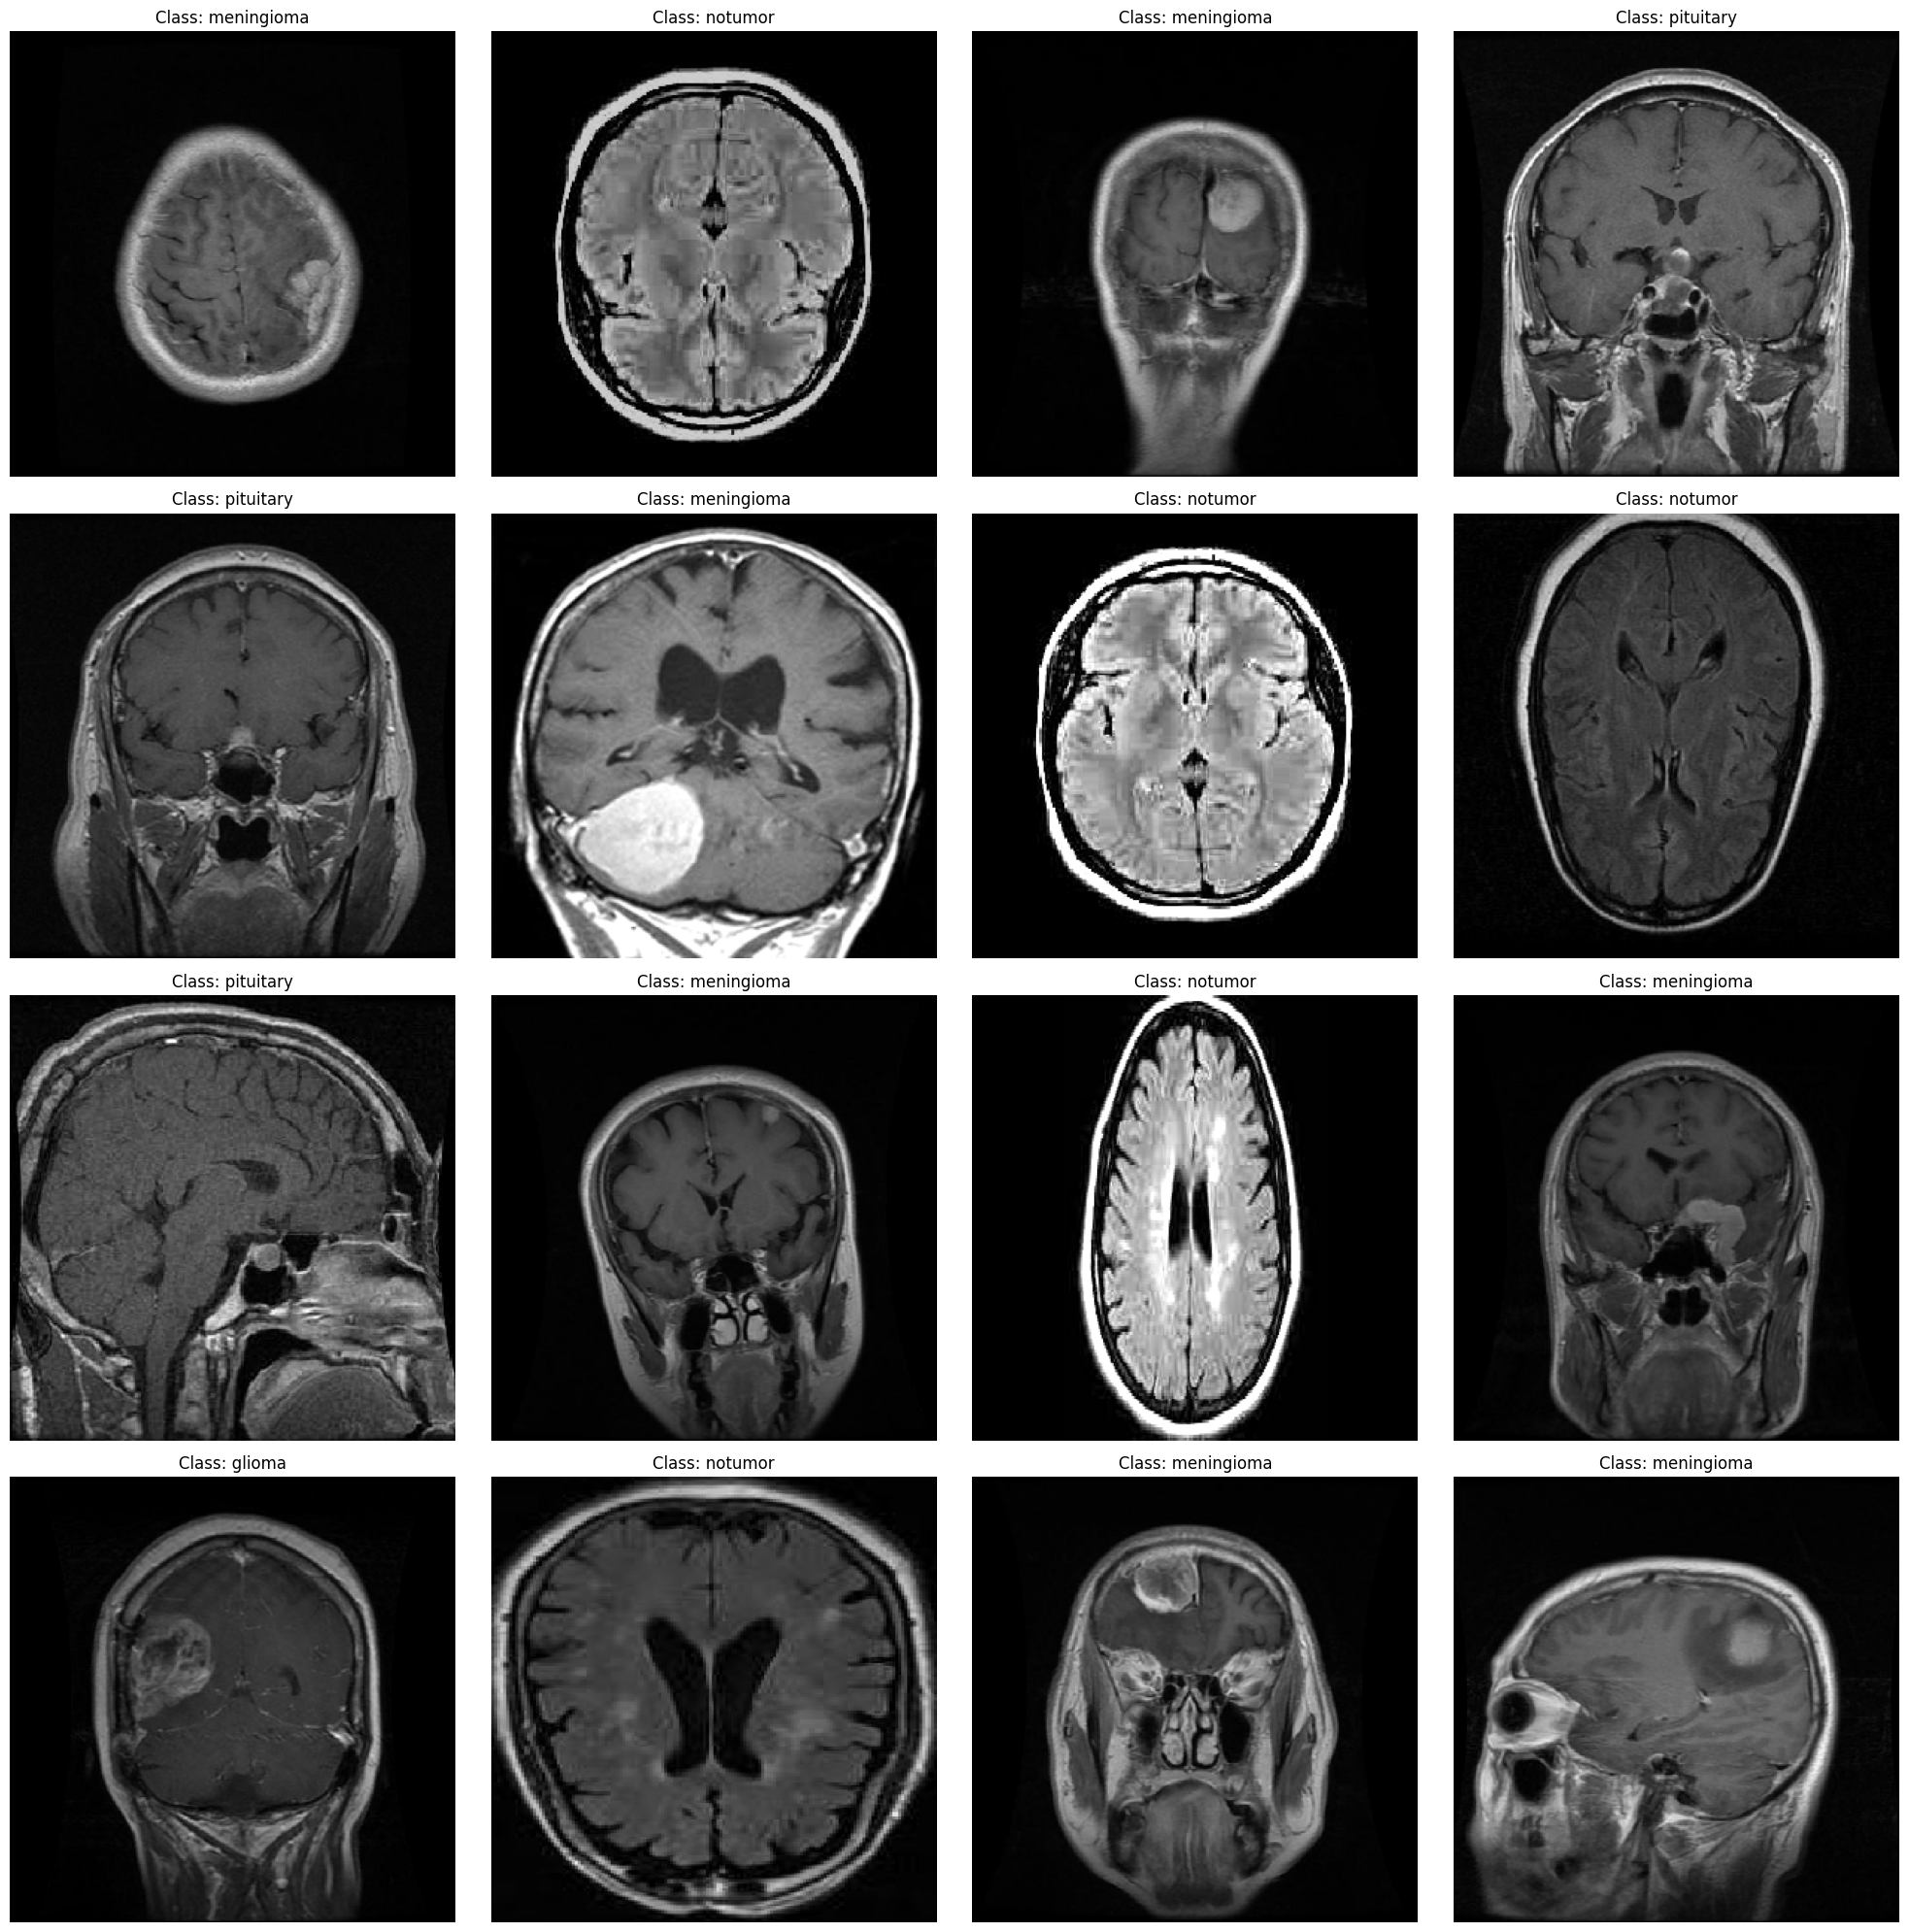

In [34]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  class_index = np.argmax(label)

  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  index_position = class_indices.index(class_index)

  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [35]:
# Xception Model: A deep learning model that is commonly used for training deep learning models with images

img_shape = [299, 299, 3] #img are size 299pixel x 299pixel and 3 is for RGB format

base_model = tf.keras.applications.Xception(include_top=False,
                                            weights="imagenet",
                                            input_shape=img_shape,
                                            pooling='max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3), # used to prevent overfitting (model learns training data too well and performs poorly on new data)
    Dense(128, activation='relu'), # taking output from previous layer and transform it into final predictions / relu helps model learn non-linear relationships between input and output
    Dropout(rate=0.25),
    Dense(4, activation='softmax') # same number of neruons as classes in dataset / softmax is used in the last layer in a classification model and takes the output from the previous layer and tranforms it into a probability distribution over the classes so the probabiliites add up to 100%
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
# adamax help smodel learn by adjusting the size of steps when it's updating it's knowledge and the weight of the model.
model.compile(Adamax(learning_rate=0.001), # low learning_rate -> learns slowly but more accurately.
              loss='categorical_crossentropy', # measure of how the predicted probabilty differ from the actual probabilites of each class in the dataset (penalizes the model for incorrect predictions)
              metrics=['accuracy',
              Precision(),
              Recall()])

In [37]:
# epochs -> the number of passes the training data will do and it will update the models weights based on the loss and metrics we set earlier
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/173 ━━━━━━━━━━━━━━━━━━━━ 5:01:01 105s/step - accuracy: 0.2188 - loss: 4.7269 - precision: 0.2188 - recall: 0.2188

KeyboardInterrupt: 

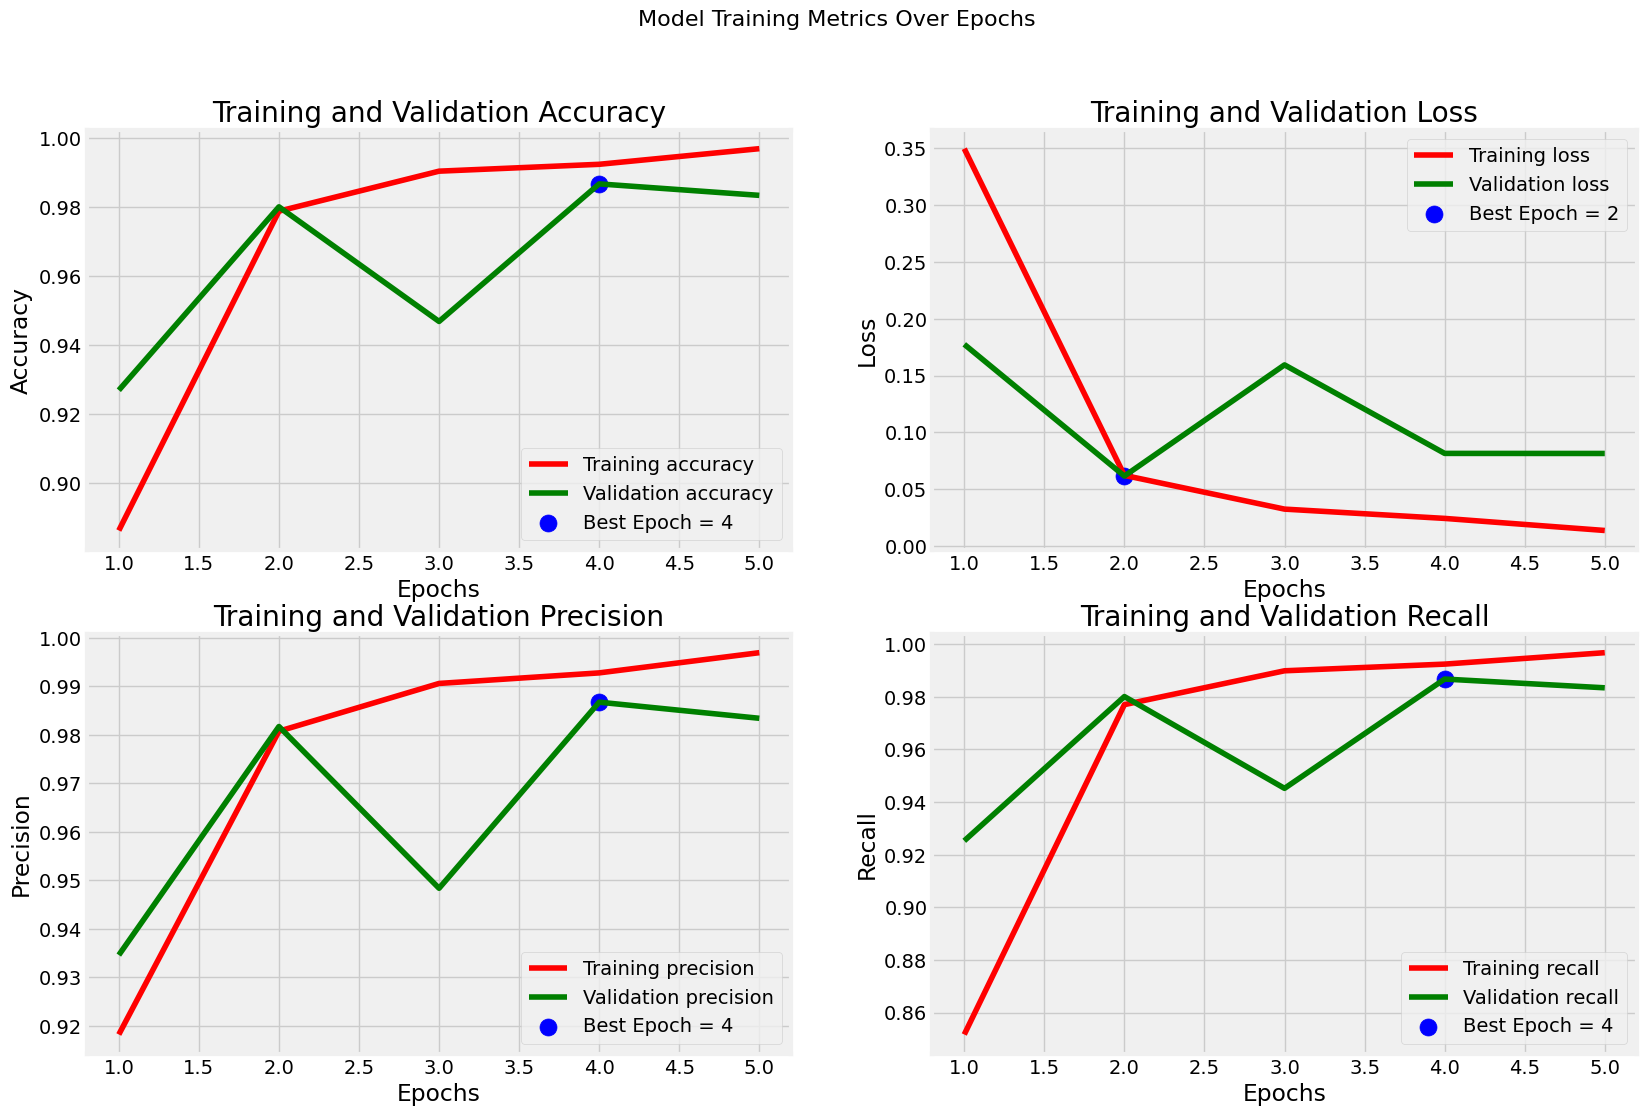

In [21]:
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i,metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [22]:
# evaluating on the training data (same data model used to learn) gives baseline on how well the model performs on data it's already seen before
train_score = model.evaluate(tr_gen, verbose=1)
# testing model on the validation dataset (data we used during training of the model) model never directly learned from this data (helps with determining overfitting or generalizing)
valid_score = model.evaluate(valid_gen, verbose=1)
# testing the model on completely new and unseen data (true measure of our models performance)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

173/173 ━━━━━━━━━━━━━━━━━━━━ 45s 258ms/step - accuracy: 0.9995 - loss: 0.0022 - precision: 0.9995 - recall: 0.9995
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.9823 - loss: 0.0851 - precision: 0.9823 - recall: 0.9823


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 395ms/step - accuracy: 0.9816 - loss: 0.0805 - precision: 0.9816 - recall: 0.9816
Train Accuracy: 99.95%
Train Loss: 0.0027%


Validation Accuracy: 98.34%
Validation Loss: 0.0789%


Test Accuracy: 98.67%
Test Loss: 0.0668%


38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step


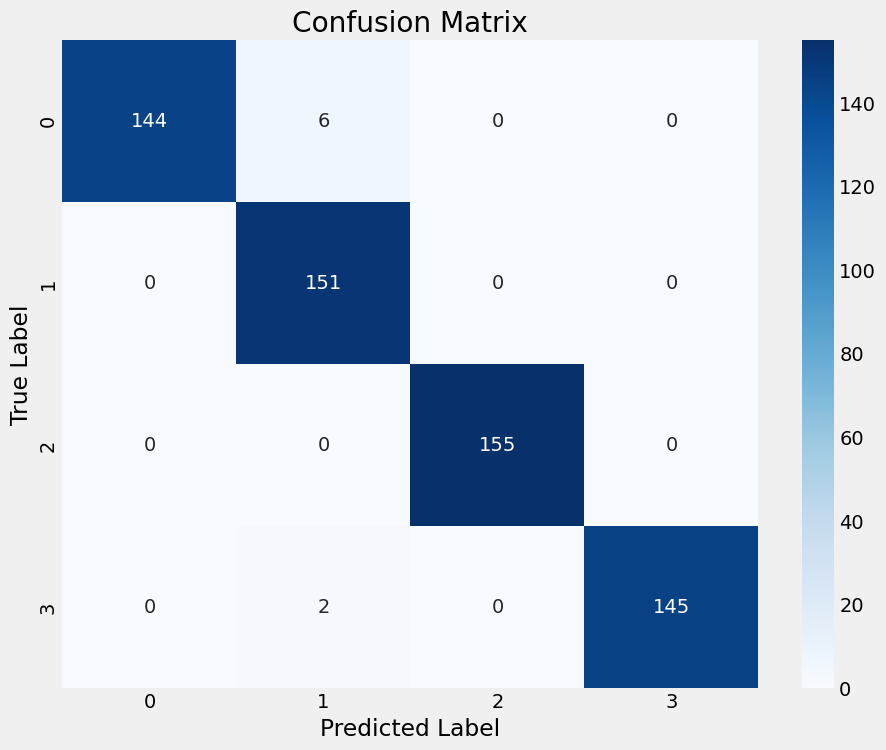

In [23]:
# asking our trained model to make predicitons on our test dataset
preds = model.predict(ts_gen)
# converting probability scores into actual predictions
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels (diff type of tumors)
  labels = list(class_dict.keys())

  # Create Figure
  plt.figure(figsize=(6,8))

  # Load and preprocess image (MRI Image)
  img = Image.open(img_path)
  resized_img = img.resize((299, 299)) #pixel x pixel
  img_array = np.array(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities, color='skyblue')
  plt.xlabel('Probability', fontsize=15)
  plt.title('Class Probabilities')

  # Add probability labesl to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


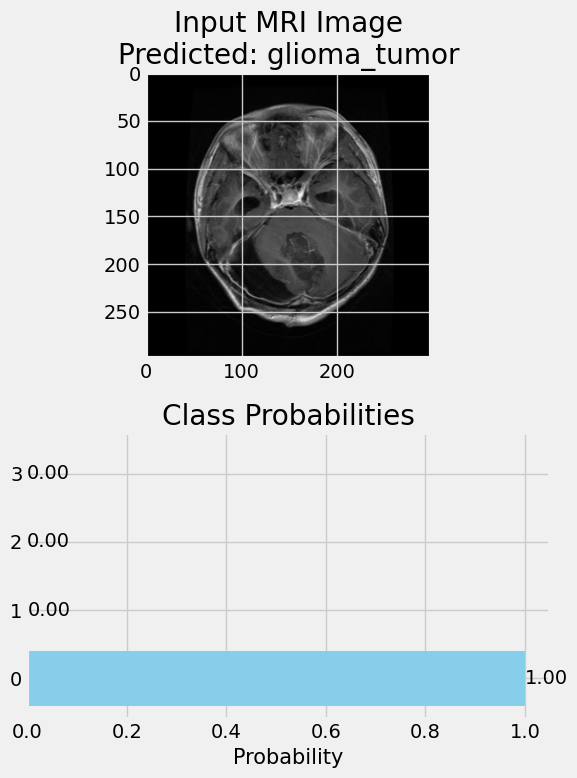


Predicted tumor type: glioma_tumor


In [25]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


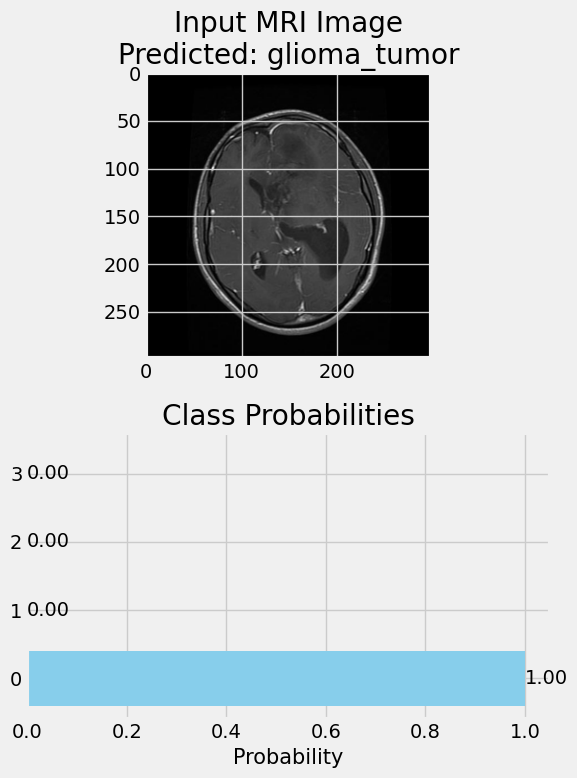


Predicted tumor type: glioma_tumor


In [26]:
predict("/content/Testing/glioma/Te-glTr_0009.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


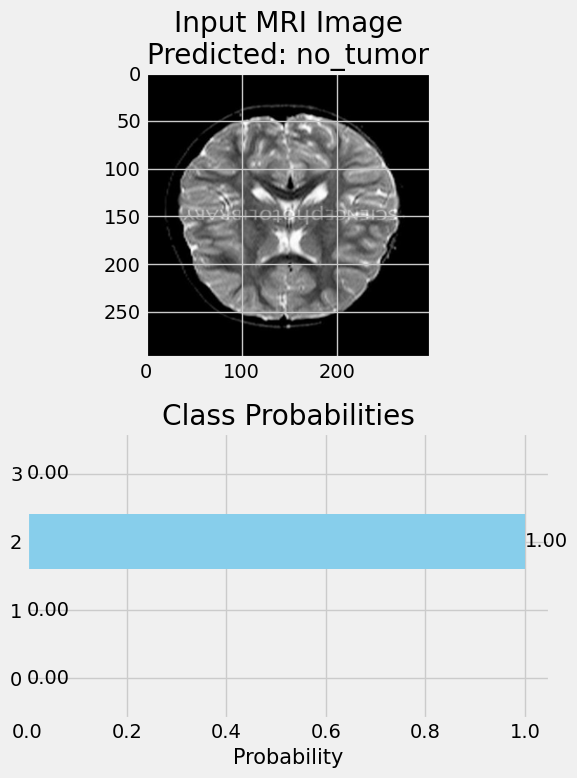


Predicted tumor type: no_tumor


In [27]:
predict("/content/Testing/notumor/Te-no_0106.jpg")

In [29]:
# save the model weights
model.save_weights('xception_model.weights.h5')

In [33]:
# CNN - Convolutional Neural Network (use convolution to analyze patterns in the image)
# Xception Model = 36 Concolutional Layers | 21 million parameters | 99% Accuracy
# Custom CNN Model = 4 Convolutional Layers | 4.7 million parameters | Goal: Achieve 90+% accuracy

from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers

batch_size = 16 # lower batch size means fewer images are processes simultaneously  (reduces memory on model)

img_size = (224, 224)

image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=batch_size,
                                             target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                             y_col='Class',
                                             batch_size=16,
                                             target_size=img_size,
                                             shuffle=False)

Found 5521 validated image filenames belonging to 4 classes.
Found 602 validated image filenames belonging to 4 classes.
Found 603 validated image filenames belonging to 4 classes.


In [34]:
# architecture for custom CNN model
# Create a sequential model

cnn_model = Sequential()

# Convolutional Layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
# Batch Normalization -> improves stability and speed of training the neurons
cnn_model.add(BatchNormalization())
# MaxPooling Layer - reduces spatial dimensions of data making it more computational efficient and more robust. disregards less important details and focuses on the more prominent features in the image
# reduces number of parameters so it helps with overfitting
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout randomly turns off some connections to prevent overfitting
# forces model to learn many different ways to learn what tumor it is rather than rely on just one way
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128,(3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64,(3, 3), padding='same', activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully Connected Layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4,activation='softmax')) # output layer with 4 neurons for 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy',
              Precision(),
              Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           1,0

 Total params: 4,780,484 (18.24 MB)

 Trainable params: 4,778,052 (18.23 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [39]:
history = cnn_model.fit(tr_gen, epochs=6, validation_data=valid_gen)

Epoch 1/6
346/346 ━━━━━━━━━━━━━━━━━━━━ 112s 323ms/step - accuracy: 0.9139 - loss: 0.8127 - precision_3: 0.9217 - recall_3: 0.9029 - val_accuracy: 0.8671 - val_loss: 0.8093 - val_precision_3: 0.8805 - val_recall_3: 0.8571
Epoch 2/6
346/346 ━━━━━━━━━━━━━━━━━━━━ 111s 320ms/step - accuracy: 0.9261 - loss: 0.6566 - precision_3: 0.9357 - recall_3: 0.9195 - val_accuracy: 0.9020 - val_loss: 0.6718 - val_precision_3: 0.9030 - val_recall_3: 0.8970
Epoch 3/6
346/346 ━━━━━━━━━━━━━━━━━━━━ 111s 321ms/step - accuracy: 0.9277 - loss: 0.5670 - precision_3: 0.9341 - recall_3: 0.9197 - val_accuracy: 0.8787 - val_loss: 0.6460 - val_precision_3: 0.8915 - val_recall_3: 0.8738
Epoch 4/6
346/346 ━━━━━━━━━━━━━━━━━━━━ 142s 321ms/step - accuracy: 0.9364 - loss: 0.4986 - precision_3: 0.9427 - recall_3: 0.9310 - val_accuracy: 0.9269 - val_loss: 0.4924 - val_precision_3: 0.9313 - val_recall_3: 0.9236
Epoch 5/6
346/346 ━━━━━━━━━━━━━━━━━━━━ 144s 327ms/step - accuracy: 0.9456 - loss: 0.4496 - precision_3: 0.9509 - rec

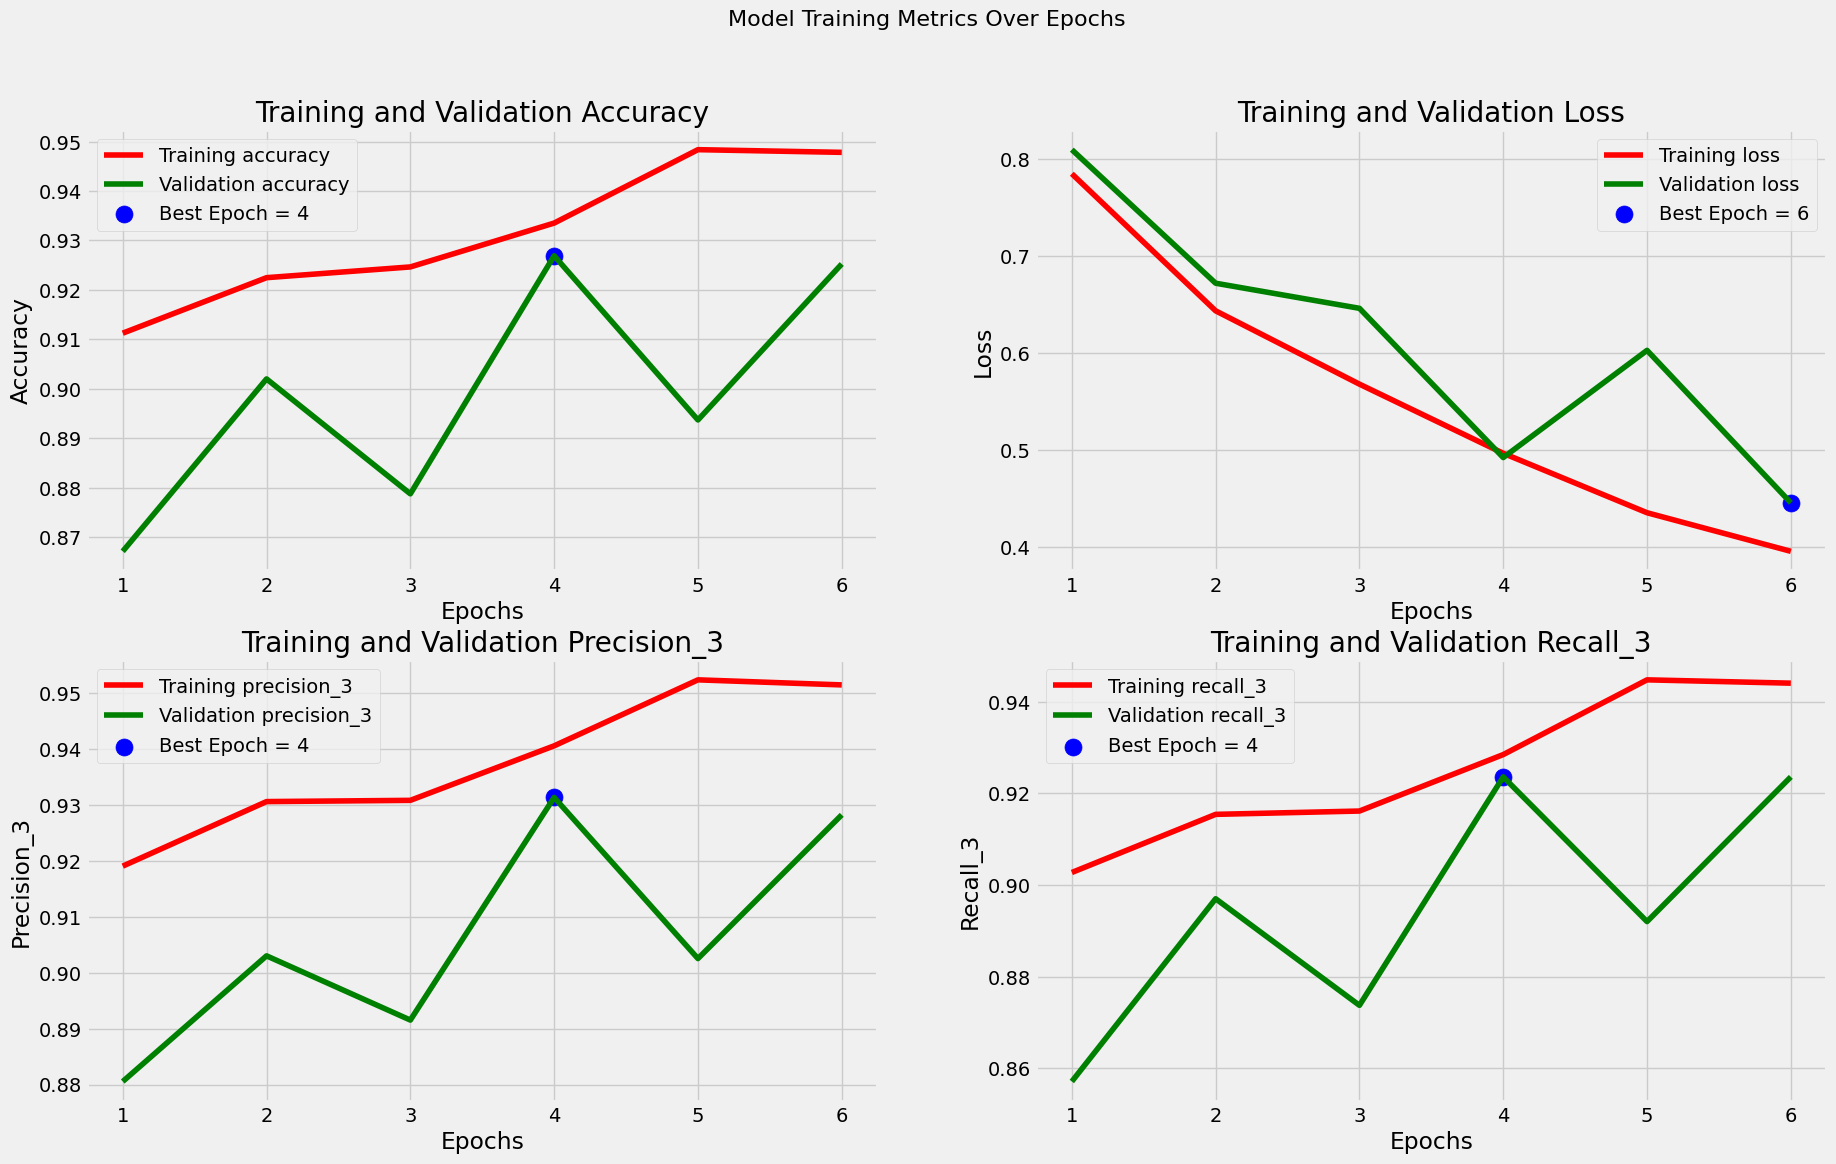

In [86]:
metrics = ['accuracy', 'loss', 'precision_3', 'recall_3']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

plt.figure(figsize=(20,12))
plt.style.use('fivethirtyeight')

for i,metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best Epoch = {best_epochs[metric]}')
  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [41]:
# evaluating on the training data (same data model used to learn) gives baseline on how well the model performs on data it's already seen before
train_score = cnn_model.evaluate(tr_gen, verbose=1)
# testing model on the validation dataset (data we used during training of the model) model never directly learned from this data (helps with determining overfitting or generalizing)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
# testing the model on completely new and unseen data (true measure of our models performance)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}%")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}%")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}%")

346/346 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.9736 - loss: 0.3256 - precision_3: 0.9744 - recall_3: 0.9725
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9287 - loss: 0.4074 - precision_3: 0.9340 - recall_3: 0.9278
 2/38 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.8750 - loss: 0.4704 - precision_3: 0.8730 - recall_3: 0.8594 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 263ms/step - accuracy: 0.9126 - loss: 0.4560 - precision_3: 0.9147 - recall_3: 0.9010
Train Accuracy: 97.57%
Train Loss: 0.3162%


Validation Accuracy: 92.86%
Validation Loss: 0.4443%


Test Accuracy: 92.21%
Test Loss: 0.4458%


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step


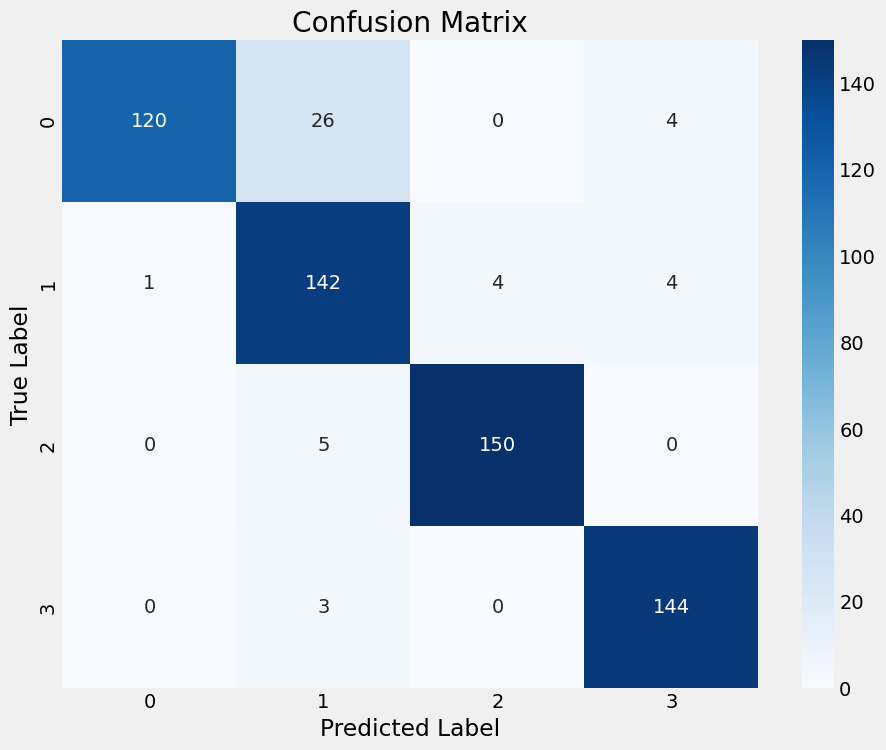

In [42]:
# asking our trained model to make predicitons on our test dataset
preds = cnn_model.predict(ts_gen)
# converting probability scores into actual predictions
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       150
           1       0.81      0.94      0.87       151
           2       0.97      0.97      0.97       155
           3       0.95      0.98      0.96       147

    accuracy                           0.92       603
   macro avg       0.93      0.92      0.92       603
weighted avg       0.93      0.92      0.92       603



In [61]:
cnn_model.save('cnn_model.h5')

### Part 2: Streamlit Web App

In [8]:
pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [9]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [10]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [11]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [40]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# create an output folder for saliency maps
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
    The saliency map was generated by a deep learning model that was trained to classify brain tumors
    as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}% .

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
      in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
      in your explanation.
    - Keep your explanation to 4 sentences max.

    Let's think step by step about this. Verify step by step.
    """

    img = PIL.Image.open(img_path)

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, img])

    return response.text


def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular  mask for the brain area (focus only on the brain)
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients (adjust contrast so the important areas stand out better)
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
      brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap((255 * gradients).astype(np.uint8), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
      f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img


def load_xception_model(model_path):
  img_shape = (299,299,3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation="relu"),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  #Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)
  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

    selected_model = st.radio("Select a model:", ("Transfer Learning - Xception", "Custom CNN"))

    if selected_model == "Transfer Learning - Xception":
        model = load_xception_model("/content/xception_model.weights.h5")
        img_size = ((299,299))
    else:
        model = load_model("/content/cnn_model.h5")
        img_size = ((224,224))

    labels = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)

    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f"Predicted Class: {result}")
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.4f}")

    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
        st.image(img, caption="Uploaded Image", use_column_width=True)
    with col2:
        st.image(saliency_map, caption="Saliency Map", use_column_width=True)

    st.write("## Classification Results")

    result_container = st.container()
    result_container = st.container()
    result_container.markdown(
        f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                        {result}
                    </p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                        {prediction[0][class_index]:.4%}
                    </p>
                </div>
            </div>
        </div>
        """,
        unsafe_allow_html=True
    )

    # Prepare data for Plotly chart
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color=['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title="Probabilities for each class",
        xaxis_title="Probability",
        yaxis_title="Class",
        height=400,
        width=600,
        yaxis=dict(autorange="reversed")
    )

    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )

    # Display the Plotly chart
    st.plotly_chart(fig)



    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

    st.write('##Explanation')
    st.write(explanation)


Overwriting app.py


In [13]:
thread = Thread(target=run_streamlit)
thread.start()

Exception in thread 

In [14]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Thread-10 (run_streamlit):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-11-a0e779c7be9a>", line 2, in run_streamlit
NameError: name 'os' is not defined


In [15]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL: ", public_url)

Public URL:  NgrokTunnel: "https://7972-34-139-21-26.ngrok-free.app" -> "http://localhost:8501"


Writing .env
